In [ ]:
%config IPCompleter.greedy=True

In [17]:
from PIL import Image
import os
from glob import glob
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import keras as kr
from sklearn.preprocessing import StandardScaler

In [18]:
#데이터 불러오기 


image_dir_path = os.path.dirname(os.path.abspath("__file__")) + '/Data(224)'
categories = os.listdir('./Data(224)')
select_cat = []
nb_classes = 0

# image_w = 28
# image_h = 28


X = []
y = []
#이미지 몇개 이상 분포만 불러오는 부분
count = 0;
for idx, c in enumerate(categories):
    dir = image_dir_path + '/' + c
    f = glob(dir+'/*.jpg')
    if len(f) >= 200:
        nb_classes += 1
        select_cat.append(dir)
# for images in files:
#     io.imshow(images)
#     #io.show()

# img_data=[]
# img = io.imread(files[1:3])
# img

#data = img.reshape(-1,224*224*3)/255
# img = io.imread(images[:1])
# data = img.reshape(-1,224*224*3)/255
# print(data)

In [19]:
#이미지 데이터 불러오고 라벨링
for index, cat in enumerate(select_cat):
    files = glob(select_cat[index]+'/*.jpg')
    for i, f in enumerate(files):
            img = Image.open(f)
            img = img.convert("L")
            #img = img.resize((image_w, image_h))
            data = np.asarray(img)
            
            X.append(data)
            y.append(index)

In [20]:
X = np.array(X)
y = np.array(y)

# X = X.reshape(-1,224*224*3)/255
# print(X.shape)

nsamples, nx, ny = X.shape
X = X.reshape((nsamples,nx*ny))
# print(X.shape)
# print(X.shape)
# print(y.shape)

In [21]:
#데이터 스플릿

#test 20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
x_test, x_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

# X_train, X_test, y_trian, y_test = trian_test_split(X,y,test_size=0.2)
# x_test, x_val, y_test, y_val = train_test_split(X_train, y_train, test_size = 0.25)
sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X_train)
x_test_std = sc.transform(x_test)
x_val_std = sc.transform(x_val)

print(X_train_std.shape, y_train.shape)
print(x_test_std.shape, y_test.shape)
print(x_val_std.shape, y_val.shape)

(2127, 50176) (2127,)
(709, 50176) (709,)
(710, 50176) (710,)


In [22]:
# #svm모델 생성
# from sklearn.svm import SVC
# svm_model = SVC(kernel='rbf', C = 20.0, gamma = 'auto')
# svm_model.fit(X_train_std, y_train)
# y_pred = svm_model.predict(x_val_std)

In [23]:
# print("prediction accuracy: {:.2f}%".format(np.mean(y_pred == y_val)))

In [25]:
from sklearn.svm import SVC
scores = []
for thisC in [*range(1,12)]:
    svc= SVC(kernel = 'linear', C=thisC)
    model=svc.fit(X_train_std, y_train)
    scoreTrain=model.score(X_train_std, y_train)
    scoreTest=model.score(x_val_std, y_val)
    print("선형 SVM : C : {}, training score:{:2f}, validation score:{:2f}".format
         (thisC, scoreTrain, scoreTest))
    scores.append([scoreTrain, scoreTest])

선형 SVM : C : 1, training score:1.000000, validation score:0.535211
선형 SVM : C : 2, training score:1.000000, validation score:0.535211
선형 SVM : C : 3, training score:1.000000, validation score:0.535211
선형 SVM : C : 4, training score:1.000000, validation score:0.535211
선형 SVM : C : 5, training score:1.000000, validation score:0.535211
선형 SVM : C : 6, training score:1.000000, validation score:0.535211
선형 SVM : C : 7, training score:1.000000, validation score:0.535211
선형 SVM : C : 8, training score:1.000000, validation score:0.535211
선형 SVM : C : 9, training score:1.000000, validation score:0.535211
선형 SVM : C : 10, training score:1.000000, validation score:0.535211
선형 SVM : C : 11, training score:1.000000, validation score:0.535211


KeyboardInterrupt: 

<AxesSubplot:>

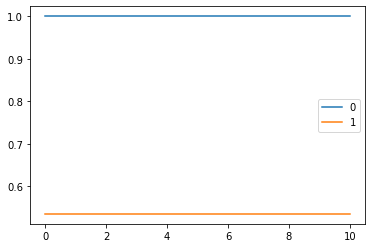

In [27]:
import pandas as pd
pd.DataFrame(scores).plot()
# <matplotlib.axes._subplots.AxesSubplot at 0x1cc9339dac8>

In [29]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

model=SVC(kernel='linear', C=20).fit(X_train_std,y_train)
scores=cross_val_score(model, X_train_std, y_train, cv=5)
print("CV 점수: " +str(scores))
st_scores=cross_val_score(model, X_train_std, y_train,cv=StratifiedKFold(5,random_state=10, shuffle = True))
print("CV 평균점수 : " +str(scores.mean()))
print("StratifiedKFold CV 평균점수 :  " +str(st_scores.mean()))

CV 점수: [0.52816901 0.53286385 0.55764706 0.49882353 0.54823529]
CV 평균점수 : 0.5331477492405413
StratifiedKFold CV 평균점수 :  0.5491389119027893
